In [1]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

# Dataset

In [4]:
transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))
])

In [5]:
batch_size = 64
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                             download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Load Model

In [51]:
# VGG Model
"""
%run /content/drive/MyDrive/Colab\ Notebooks/DeepLearningZeroToAll_VGG.ipynb
model.to(device)
"""

'\n%run /content/drive/MyDrive/Colab\\ Notebooks/DeepLearningZeroToAll_VGG.ipynb\nmodel.to(device)\n'

In [54]:
# Resnet Model
import torchvision.models.resnet as resnet

model = resnet.resnet18(pretrained=True, progress=True)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Training Step

In [55]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

In [58]:
epochs = 10 
train_costs = []
for epoch in range(epochs):
  print(f"Epoch: {epoch+1} =-=-=-=-=-=-=-=-=-=-=")
  temp_cost = 0.
  for X, y in train_dataloader:
    X = X.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    out = model(X)
    cost = loss_fn(out, y)
    cost.backward()
    optimizer.step()

    temp_cost += cost / len(train_dataloader)
  train_costs.append(temp_cost)
  scheduler.step()

Epoch: 1 =-=-=-=-=-=-=-=-=-=-=
Epoch: 2 =-=-=-=-=-=-=-=-=-=-=
Epoch: 3 =-=-=-=-=-=-=-=-=-=-=
Epoch: 4 =-=-=-=-=-=-=-=-=-=-=
Epoch: 5 =-=-=-=-=-=-=-=-=-=-=
Epoch: 6 =-=-=-=-=-=-=-=-=-=-=
Epoch: 7 =-=-=-=-=-=-=-=-=-=-=
Epoch: 8 =-=-=-=-=-=-=-=-=-=-=
Epoch: 9 =-=-=-=-=-=-=-=-=-=-=
Epoch: 10 =-=-=-=-=-=-=-=-=-=-=


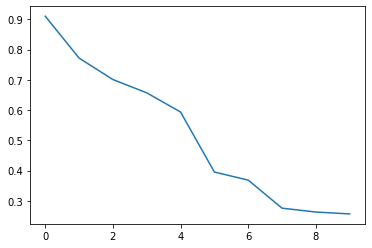

In [59]:
import matplotlib.pyplot as plt
train_costs = [cost.item() for cost in train_costs]
plt.plot(train_costs)

# Test Step

In [60]:
correct = 0
total = len(test_dataloader.dataset)

with torch.no_grad():
  for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)
    out = model(X)
    pred = torch.argmax(out, 1)
    correct += (pred == y).sum().item()

print(f"{correct} / {total} => {(correct / total * 100)}")

7889 / 10000 => 78.89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

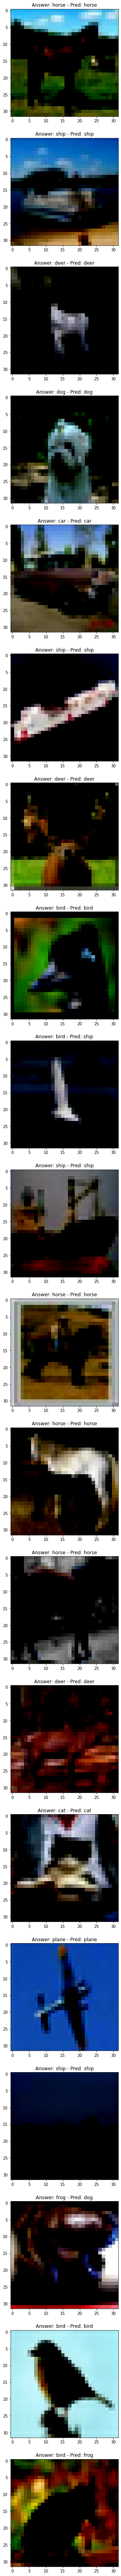

In [61]:
# Print image and Compare y with pred
import matplotlib.pyplot as plot

show_num = 20

X, y = next(iter(test_dataloader))
X = X.to(device)
y = y.to(device)
pred = model(X)
pred_ = torch.argmax(pred, 1)

plt.figure(figsize=(6, 6 * show_num))
for i in range(show_num):
  plt.subplot(show_num, 1, i+1)
  ans = classes[y[i].long()]
  pred__ = classes[pred_[i].long()]
  plt.title(f"Answer: {ans} - Pred: {pred__}")
  plt.imshow(X.to("cpu")[i].permute(1,2,0))
plt.show()